In [1]:
import sys ,os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.5,style='whitegrid',context="paper")
from math import pi


In [2]:
## source code ##
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
    plt.ylim(0,1)
#     plt.yticks([0.2,0.4,0.6,0.8,1.0], ["0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
#     plt.ylim(0.2,1)
#     plt.yticks([0.4,0.6,0.8,1.0], ["0.4","0.6","0.8","1.0"], color="grey", size=10)
#     plt.ylim(0.3,1)
#     plt.yticks([0.7,0.8,0.9,1.0], ["0.7","0.8","0.9","1.0"], color="grey", size=10)
#     plt.ylim(0.7,1)

      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
    plt.legend( bbox_to_anchor=(0, 1))

#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
#     plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")

    #   plt.savefig(f"../figures/{title}.svg",format="svg")
    return ax

In [3]:
df_metrics_unbalanced =pd.read_csv('../data/dataframe_metrics_shakel_unbalanced.csv')
df_metrics_unbalanced.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

df_metrics_balanced =pd.read_csv('../data/dataframe_metrics_shakel_balanced.csv')
df_metrics_balanced.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']


In [4]:
df_CV_10k = pd.read_csv("../data/dataframe_metrics_shakel_metrics_crossvalidation.csv")
# df_CV_10k = df_CV_10k[['BM5 bal  ',' 10kCV Bal ',' BM5 unb ','10kCV Unb ']]
# df_CV_10k.columns = ['Bal  BM4/5-up','Bal 10CV','3K BM4/5-up','3K-10CV']
# df_CV_10k["Metrics"] = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']
# df_CV_10k = df_CV_10k.set_index("Metrics")

In [5]:
df_CV_10k

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
Bal BM4/5-up,0.8321,0.8669,0.7973,0.8105,0.8569,0.8377,0.8260,0.6658
Bal-10CV,0.8222,0.9246,0.7199,0.7680,0.9058,0.8388,0.8017,0.6590
3K-BM4/5-up,0.9164,0.9232,0.7985,0.9874,0.3777,0.9543,0.5128,0.5133
3K-10CV,0.9511,0.9624,0.7341,0.9859,0.5043,0.9740,0.5973,0.5840


In [6]:
df_CV_10k.T

,Bal BM4/5-up,Bal-10CV,3K-BM4/5-up,3K-10CV
Acc,0.8321,0.8222,0.9164,0.9511
R_inc,0.8669,0.9246,0.9232,0.9624
R_corr,0.7973,0.7199,0.7985,0.7341
P_inc,0.8105,0.7680,0.9874,0.9859
P_corr,0.8569,0.9058,0.3777,0.5043
F1_inc,0.8377,0.8388,0.9543,0.9740
F1_corr,0.8260,0.8017,0.5128,0.5973
MCC,0.6658,0.6590,0.5133,0.5840


b RF 
gold PRC 
g SVM 


<PolarAxesSubplot:>

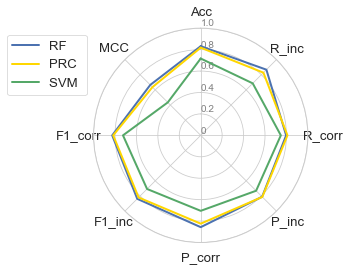

In [7]:
plot_radar(df_metrics_balanced,"Radar_plot_metrics_balanced",['b','gold','g'],['solid','solid','solid'])

Navy RF 
goldenrod PRC 
darkgreen SVM 


<PolarAxesSubplot:>

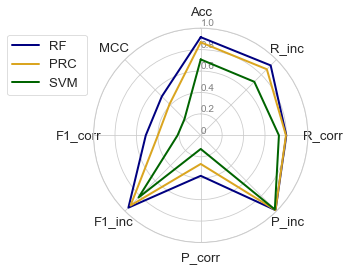

In [8]:
plot_radar(df_metrics_unbalanced,"Radar_plot_metrics_unbalanced",['Navy','goldenrod','darkgreen'],['solid','solid','solid'])

b Bal BM4/5-up
red Bal-10CV
Navy 3K-BM4/5-up
orange 3K-10CV


<PolarAxesSubplot:>

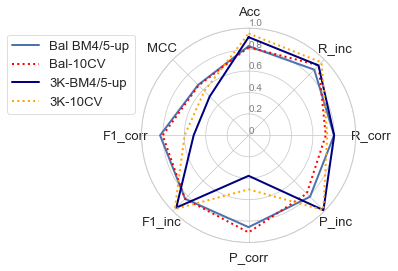

In [9]:
# plot_radar(df_CV_10k,"CV_performance",['b','indianred','Navy','darkorange'],['solid','dotted','solid','dotted'])
plot_radar(df_CV_10k,"CV_performance",['b','red','Navy','orange'],['solid','dotted','solid','dotted'])

In [10]:
df_hard = pd.read_csv("../data/dataframe_metrics_hard_performance.csv")
df_hard.set_index("Metrics",inplace=True)

In [11]:
df_hard = df_hard.T

In [12]:
df_hard.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

In [13]:
df_fig_10 = pd.read_csv("../data/dataframe_metrics_CODES_performance_final.csv")

In [14]:
df_fig_10

,Accuracy,Recall_inc,Recall_cor,Precision_inc,Precision_cor,F1_inc,F1_cor,MCC
RF_3K-BM4/5-up,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
CoDES_3K-BM4/5-up,0.918259,0.919743,0.898895,0.991649,0.461788,0.954343,0.610134,0.609263
CoDES_Score_set,0.707317,0.671200,0.985185,0.997139,0.280295,0.802331,0.436423,0.426736
Zdock,0.213542,0.178596,0.998177,0.999546,0.051343,0.303045,0.097663,0.094846


In [15]:
df_fig_10.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up
black CoDES_Score_set


<PolarAxesSubplot:>

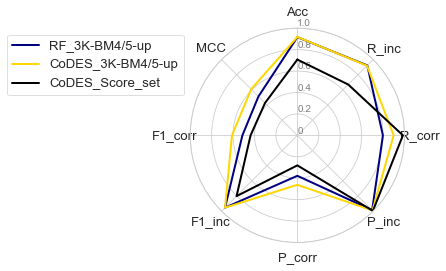

In [16]:
plot_radar(df_fig_10,"figure_10",['Navy','gold','black'],['solid','solid','solid'])

darkgrey bal-hard-10CV_bal-hard
magenta bal-hard-10CV_3K-hard


<PolarAxesSubplot:>

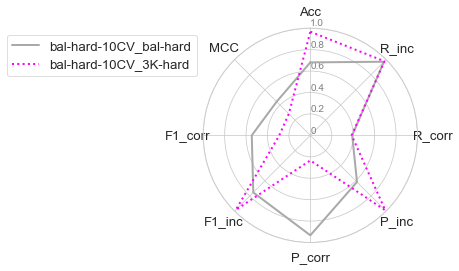

In [17]:
plot_radar(df_hard,"hard_set",['darkgrey','magenta'],['solid','dotted'])

In [18]:
df_hard

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
bal-hard-10CV_bal-hard,0.681067,0.971610,0.390523,0.615782,0.932768,0.753392,0.546630,0.444624
bal-hard-10CV_3K-hard,0.967795,0.977836,0.385701,0.989274,0.233920,0.983517,0.289714,0.284112


In [19]:
df_hard.T.columns

Index(['bal-hard-10CV_bal-hard', 'bal-hard-10CV_3K-hard'], dtype='object')

In [20]:
df_ss = pd.read_csv("../data/dataframe_metrics_Score_set_by_target.csv")


In [21]:
# df_ss.columns  = ['Target','Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']
df_ss.columns

Index(['Target', 'Acc', 'R_inc', 'R_corr', 'P_inc', 'P_corr', 'F1_inc',
       'F1_corr', 'MCC'],
      dtype='object')

In [22]:
df_ss.set_index("Target",inplace=True)

<AxesSubplot:xlabel='Target'>

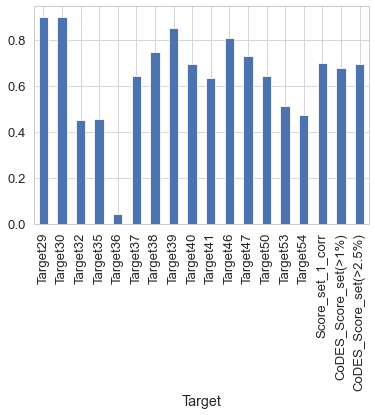

In [23]:
df_ss["Acc"].T.plot(kind="bar")

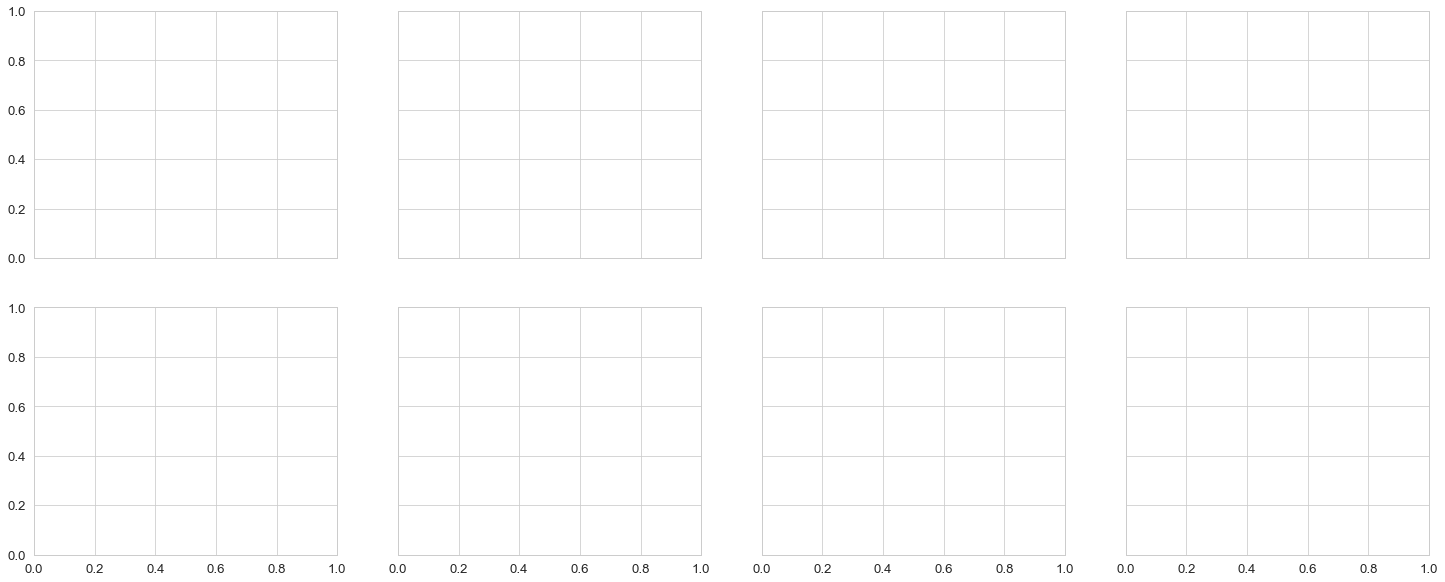

In [24]:
fig , axs = plt.subplots(nrows=2 , ncols=4 ,sharex=True,sharey=True, figsize=(25,10))

In [25]:
for z in ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']:
    print (z)
for m in range(2):
    for n in range(4):
        print (m,n)




my_dict = {'Acc' : (0 , 0),
'R_inc' : (0 ,1 ),
'R_corr' :( 0 ,2),
'P_inc' : (0 ,3 ),
'P_corr' : (1 ,0 ),
'F1_inc' :(1 ,1 ),
'F1_corr' :( 1, 2),
'MCC' : (1  ,3)}

Acc
R_inc
R_corr
P_inc
P_corr
F1_inc
F1_corr
MCC
0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [26]:
for z,c in zip(['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC'], 
               ['r','b', 'g', 'pink','gold' ,'silver' , 'Navy','black']):
    print ( my_dict[z][0], my_dict[z][1])
    df_ss[z].T.plot(kind="bar",ax=axs[my_dict[z][0]][my_dict[z][1]], title=z , color=c)


#             df_ss[z].T.plot(kind="bar")
            

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [27]:
fig.savefig(f"figures/CoDes_Score_set_by_target.png",dpi=300,transparent=True,format="png")
# plt.tight_layout()
# plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
# plt.savefig(f"figures/CoDes_Score_set_by_target.png",dpi=300,transparent=True,format="png")

In [28]:
# plot_radar(df_fig_10,"figure_10",['Navy','gold','black'],['solid','solid','solid'])

In [29]:
df_CODES_in_scoreset = pd.concat([df_fig_10.loc["CoDES_Score_set"],df_ss.loc["Score_set_1_corr"]],axis=1 )

Cyan CoDES_Score_set
DarkCyan Score_set_1_corr


<PolarAxesSubplot:>

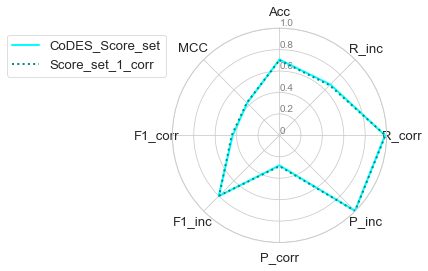

In [30]:
plot_radar(df_CODES_in_scoreset.T,"CoDES_in_Score_set",['Cyan','DarkCyan'],['solid','dotted'])

In [31]:
df_CODES_in_scoreset.round(4)

,CoDES_Score_set,Score_set_1_corr
Acc,0.7073,0.7012
R_inc,0.6712,0.6613
R_corr,0.9852,0.9889
P_inc,0.9971,0.9977
P_corr,0.2803,0.2880
F1_inc,0.8023,0.7954
F1_corr,0.4364,0.4461
MCC,0.4267,0.4310


In [32]:
df_ss.loc[['CoDES_Score_set(>1%)','CoDES_Score_set(>2.5%)' ]]

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
Target,,,,,,,,
CoDES_Score_set(>1%),0.6763,0.6213,0.9930,0.9981,0.3132,0.7658,0.4762,0.4372
CoDES_Score_set(>2.5%),0.6937,0.6216,0.9948,0.9980,0.3864,0.7661,0.5566,0.4867


In [33]:
df_CODES_in_scoreset = df_ss.loc[['CoDES_Score_set(>1%)','CoDES_Score_set(>2.5%)' ]]
# df_CODES_in_scoreset = df_ss.loc[['above_1','above_2']]
df_CODES_in_scoreset = df_CODES_in_scoreset.append(df_fig_10.loc["CoDES_Score_set"] )

In [34]:
df_CODES_in_scoreset.T.round(4)

Target,CoDES_Score_set(>1%),CoDES_Score_set(>2.5%),CoDES_Score_set
Acc,0.6763,0.6937,0.7073
R_inc,0.6213,0.6216,0.6712
R_corr,0.9930,0.9948,0.9852
P_inc,0.9981,0.9980,0.9971
P_corr,0.3132,0.3864,0.2803
F1_inc,0.7658,0.7661,0.8023
F1_corr,0.4762,0.5566,0.4364
MCC,0.4372,0.4867,0.4267


seagreen CoDES_Score_set(>1%)
royalblue CoDES_Score_set(>2.5%)
Black CoDES_Score_set


<PolarAxesSubplot:>

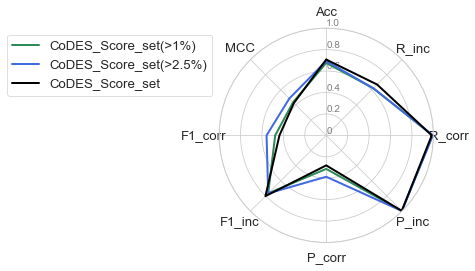

In [35]:
plot_radar(df_CODES_in_scoreset,"CoDES_in_Score_set_1_2",['seagreen','royalblue','Black'],['solid','solid','solid'])

In [36]:
df_fig_10 = df_fig_10.loc[['RF_3K-BM4/5-up','CoDES_3K-BM4/5-up','CoDES_Score_set']]
df_fig_10 = df_fig_10.append(df_ss.loc['CoDES_Score_set(>2.5%)' ])


Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up
black CoDES_Score_set
green CoDES_Score_set(>2.5%)


<PolarAxesSubplot:>

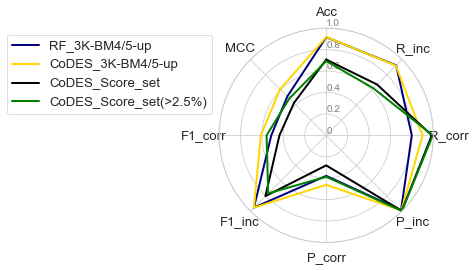

In [37]:
plot_radar(df_fig_10,"figure_10",['Navy','gold','black','green'],['solid','solid','solid','solid'])

In [38]:
df_fig_10

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF_3K-BM4/5-up,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
CoDES_3K-BM4/5-up,0.918259,0.919743,0.898895,0.991649,0.461788,0.954343,0.610134,0.609263
CoDES_Score_set,0.707317,0.671200,0.985185,0.997139,0.280295,0.802331,0.436423,0.426736
CoDES_Score_set(>2.5%),0.693700,0.621600,0.994800,0.998000,0.386400,0.766100,0.556600,0.486700


Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up


<PolarAxesSubplot:>

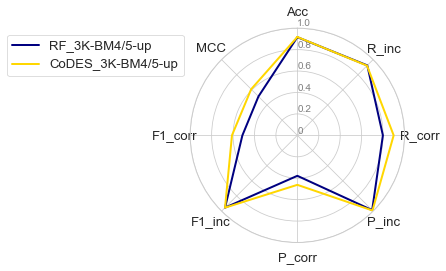

In [39]:
plot_radar(df_fig_10.loc[['RF_3K-BM4/5-up','CoDES_3K-BM4/5-up']],"figure_10_a",['Navy','gold'],['solid','solid'])

gold CoDES_3K-BM4/5-up
black CoDES_Score_set
green CoDES_Score_set(>2.5%)


<PolarAxesSubplot:>

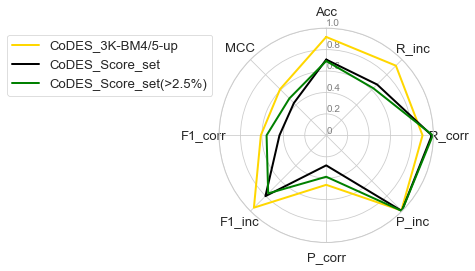

In [40]:
plot_radar(df_fig_10.loc[['CoDES_3K-BM4/5-up','CoDES_Score_set','CoDES_Score_set(>2.5%)']],
           "figure_10_b",
           ['gold','black','green'],
           ['solid','solid','solid'])

In [41]:
df_fig_10

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF_3K-BM4/5-up,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
CoDES_3K-BM4/5-up,0.918259,0.919743,0.898895,0.991649,0.461788,0.954343,0.610134,0.609263
CoDES_Score_set,0.707317,0.671200,0.985185,0.997139,0.280295,0.802331,0.436423,0.426736
CoDES_Score_set(>2.5%),0.693700,0.621600,0.994800,0.998000,0.386400,0.766100,0.556600,0.486700


In [42]:
df_CV_10k.T

,Bal BM4/5-up,Bal-10CV,3K-BM4/5-up,3K-10CV
Acc,0.8321,0.8222,0.9164,0.9511
R_inc,0.8669,0.9246,0.9232,0.9624
R_corr,0.7973,0.7199,0.7985,0.7341
P_inc,0.8105,0.7680,0.9874,0.9859
P_corr,0.8569,0.9058,0.3777,0.5043
F1_inc,0.8377,0.8388,0.9543,0.9740
F1_corr,0.8260,0.8017,0.5128,0.5973
MCC,0.6658,0.6590,0.5133,0.5840


In [43]:
df_metrics_balanced

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF,0.832070,0.866860,0.797279,0.810467,0.856903,0.837716,0.826017,0.665753
PRC,0.818410,0.827386,0.809434,0.812794,0.824231,0.820025,0.816765,0.636922
SVM,0.716994,0.686329,0.747658,0.731171,0.704455,0.708041,0.725414,0.434806


In [44]:
df_metrics_unbalanced

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
PRC,0.868326,0.872566,0.795650,0.986521,0.267004,0.926051,0.399832,0.411593
SVM,0.708476,0.707225,0.729924,0.978206,0.126983,0.820932,0.216331,0.214437


In [45]:
#pd.concat([df_metrics_balanced,df_metrics_unbalanced,df_CV_10k,df_fig_10]).to_csv("../data/all_metrics_together_CoDES.csv")

In [46]:
df_haikal_test_set_bal = pd.read_csv("../data/balanced_test_set_haikal.csv")
df_haikal_test_set_unb = pd.read_csv("../data/unbalanced_test_set_haikal.csv")
df_haikal_validation_set_bal = pd.read_csv("../data/balanced_validation_set_haikal.csv")
df_haikal_validation_set_unb = pd.read_csv("../data/unbalanced_validation_set_haikal.csv")

df_TF2_haikal_validation_unb = pd.read_csv("../data/TF2_validation_metrics.csv")
df_TF2_haikal_validation_unb.columns =['Classifier','Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']
df_TF2_haikal_validation_unb = df_TF2_haikal_validation_unb.T

df_TF2_haikal_validation_bal = pd.read_csv("../data/TF2_validation_metrics_balanced.csv")
df_TF2_haikal_validation_bal.columns =['Classifier','Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']
df_TF2_haikal_validation_bal = df_TF2_haikal_validation_bal.T

df_TF2_haikal_test_unb = pd.read_csv("../data/TF2_test_metrics.csv")
df_TF2_haikal_test_unb.columns = ['Classifier','Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']
df_TF2_haikal_test_unb = df_TF2_haikal_test_unb.T 

df_TF2_haikal_test_bal = pd.read_csv("../data/TF2_test_metrics_balanced.csv")
df_TF2_haikal_test_bal.columns = ['Classifier','Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']
df_TF2_haikal_test_bal = df_TF2_haikal_test_bal.T

In [47]:
df_TF2_haikal_test_bal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Classifier,TF2_models_snorkel_trained_8_0.5_adam.h5,TF2_models_snorkel_trained_16_0.2_adam.h5,TF2_models_snorkel_trained_32_0.5_adamax.h5,TF2_models_snorkel_trained_16_0.5_adam.h5,TF2_models_snorkel_trained_32_0.5_adam.h5,TF2_models_snorkel_trained_16_0.2_adamax.h5,TF2_models_snorkel_trained_v2_early_stop.h5,TF2_models_snorkel_trained_32_0.2_adamax.h5,TF2_models_snorkel_trained_32_0.2_adam.h5,TF2_models_snorkel_trained_8_0.2_adam.h5,TF2_models_snorkel_trained_16_0.5_adamax.h5,TF2_models_snorkel_trained_8_0.2_adamax.h5,TF2_models_snorkel_trained_8_0.5_sgd.h5,TF2_models_snorkel_trained_16_0.2_sgd.h5,TF2_models_snorkel_trained_16_0.5_sgd.h5,TF2_models_snorkel_trained_32_0.5_sgd.h5,TF2_models_snorkel_trained_32_0.2_sgd.h5,TF2_models_snorkel_trained_8_0.2_sgd.h5,TF2_models_snorkel_trained_8_0.5_adamax.h5
Acc,0.8138,0.7784,0.7769,0.7732,0.7727,0.7702,0.7677,0.7634,0.7551,0.7276,0.7075,0.7035,0.5,0.5,0.5,0.5,0.5,0.5,0.5
R_inc,0.6952,0.5774,0.5709,0.5659,0.9519,0.5559,0.5584,0.5429,0.5343,0.4767,0.4221,0.4155,1,1,1,1,1,1,1
R_cor,0.9323,0.9794,0.983,0.9805,0.5935,0.9845,0.9769,0.984,0.9759,0.9784,0.993,0.9915,0,0,0,0,0,0,0
P_inc,0.9113,0.9656,0.971,0.9666,0.7007,0.9728,0.9603,0.9713,0.9569,0.9567,0.9836,0.9799,0.5,0.5,0.5,0.5,0.5,0.5,0.5
P_cor,0.7536,0.6986,0.6961,0.6931,0.925,0.6891,0.6887,0.6828,0.677,0.6515,0.6321,0.6291,0,0,0,0,0,0,0
F1_inc,0.7887,0.7227,0.7191,0.7139,0.8072,0.7075,0.7062,0.6965,0.6858,0.6363,0.5907,0.5836,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667
F1_cor,0.8335,0.8155,0.815,0.8121,0.7231,0.8107,0.8079,0.8062,0.7994,0.7822,0.7725,0.7698,0,0,0,0,0,0,0
MCC,0.646,0.6082,0.6079,0.6004,0.5842,0.5981,0.5895,0.587,0.5687,0.5262,0.5055,0.4979,-1,-1,-1,-1,-1,-1,-1


In [48]:
def reorder_df(dataframe):
    new_cols = dataframe.loc["Classifier"].values
    # print(new_cols)
    dataframe = dataframe[1:]
    dataframe.columns = new_cols
    dataframe.index.name = "Metrics" 
    return dataframe

In [49]:
df_TF2_haikal_test_unb = reorder_df(df_TF2_haikal_test_unb)
df_TF2_haikal_validation_unb = reorder_df(df_TF2_haikal_validation_unb)
df_TF2_haikal_test_bal = reorder_df(df_TF2_haikal_test_bal)
df_TF2_haikal_validation_bal = reorder_df(df_TF2_haikal_validation_bal)

# new_cols = df_TF2_haikal_test_unb.loc["Classifier"].values
# # print(new_cols)
# df_TF2_haikal_test_unb = df_TF2_haikal_test_unb[1:]
# df_TF2_haikal_test_unb.columns = new_cols
# df_TF2_haikal_test_unb.index.name = "Metrics"
# df_TF2_haikal_test_unb.columns = new_cols


In [50]:
df_TF2_haikal_test_unb

,TF2_models_snorkel_trained_32_0.5_adam.h5,TF2_models_snorkel_trained_16_0.5_sgd.h5,TF2_models_snorkel_trained_32_0.5_sgd.h5,TF2_models_snorkel_trained_8_0.2_sgd.h5,TF2_models_snorkel_trained_32_0.2_sgd.h5,TF2_models_snorkel_trained_16_0.2_sgd.h5,TF2_models_snorkel_trained_8_0.5_sgd.h5,TF2_models_snorkel_trained_8_0.5_adamax.h5,TF2_models_snorkel_trained_8_0.5_adam.h5,TF2_models_snorkel_trained_16_0.5_adam.h5,TF2_models_snorkel_trained_16_0.2_adam.h5,TF2_models_snorkel_trained_v2_early_stop.h5,TF2_models_snorkel_trained_32_0.5_adamax.h5,TF2_models_snorkel_trained_16_0.2_adamax.h5,TF2_models_snorkel_trained_32_0.2_adamax.h5,TF2_models_snorkel_trained_32_0.2_adam.h5,TF2_models_snorkel_trained_8_0.2_adam.h5,TF2_models_snorkel_trained_8_0.2_adamax.h5,TF2_models_snorkel_trained_16_0.5_adamax.h5
Metrics,,,,,,,,,,,,,,,,,,,
Acc,0.9013,0.8861,0.8861,0.8861,0.8861,0.8861,0.8861,0.8857,0.772,0.6973,0.693,0.6814,0.6666,0.6603,0.6525,0.6319,0.5963,0.5421,0.5325
R_inc,0.9374,1,1,1,1,1,1,0.9996,0.7507,0.6607,0.656,0.6432,0.6257,0.6185,0.6097,0.5875,0.5469,0.4842,0.4732
R_cor,0.621,0,0,0,0,0,0,0,0.9377,0.982,0.9811,0.9788,0.9843,0.9857,0.9852,0.9778,0.9801,0.9922,0.9935
P_inc,0.9506,0.8861,0.8861,0.8861,0.8861,0.8861,0.8861,0.886,0.9894,0.9965,0.9963,0.9958,0.9968,0.997,0.9969,0.9952,0.9954,0.9979,0.9982
P_cor,0.5604,0,0,0,0,0,0,0,0.326,0.2712,0.2683,0.2607,0.2527,0.2494,0.2451,0.2336,0.2176,0.1983,0.1952
F1_inc,0.9439,0.9396,0.9396,0.9396,0.9396,0.9396,0.9396,0.9394,0.8537,0.7946,0.7911,0.7815,0.7688,0.7634,0.7567,0.7388,0.7059,0.6521,0.642
F1_cor,0.5891,0,0,0,0,0,0,0,0.4838,0.4251,0.4214,0.4118,0.4022,0.398,0.3925,0.3771,0.3562,0.3305,0.3263
MCC,0.5341,-1,-1,-1,-1,-1,-1,-1,0.466,0.4148,0.4106,0.3994,0.3901,0.3858,0.3794,0.3596,0.3351,0.3057,0.3005


In [51]:
# df_TF2_haikal_validation_unb

In [52]:
# new_cols = df_TF2_haikal_validation_unb.loc["Classifier"].values
# # print(new_cols)
# df_TF2_haikal_validation_unb = df_TF2_haikal_validation_unb[1:]
# df_TF2_haikal_validation_unb.columns = new_cols
# df_TF2_haikal_validation_unb.index.name = "Metrics"

In [53]:
df_haikal_test_set_bal.set_index("Metrics",inplace=True)
df_haikal_test_set_unb.set_index("Metrics",inplace=True)
df_haikal_validation_set_bal.set_index("Metrics",inplace=True)
df_haikal_validation_set_unb.set_index("Metrics",inplace=True)
# df_TF2_haikal_validation_unb.set_index("Metrics",inplace=True) 
# df_TF2_haikal_test_unb.set_index("Metrics",inplace=True)


In [54]:
pp = ['Perceptron_Ori', 'Perceptron_hAIkal' ]
tf2 = ['TF2_Ori','TF2_hAIkal' ]
rfc = ['RFC_Ori', 'RFC_hAIkal']

In [55]:
df_haikal_validation_set_unb[rfc]

,RFC_Ori,RFC_hAIkal
Metrics,,
Acc,0.9024,0.9407
F1_cor,0.5585,0.6639
F1_inc,0.9451,0.9675
P_cor,0.4118,0.5564
P_inc,0.9889,0.9859
R_cor,0.8677,0.8228
R_inc,0.9050,0.9498
MCC,0.5565,0.6473


In [56]:
df_CV_10k.columns = ['Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']

In [57]:
df_fig_10.columns = ['Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']

In [58]:
df_score_set_haikal_and_codes = pd.concat ([ df_fig_10.T ,df_haikal_test_set_unb[rfc]],axis=1)

In [59]:
df_score_set_haikal_and_codes.columns.to_list()

['RF_3K-BM4/5-up',
 'CoDES_3K-BM4/5-up',
 'CoDES_Score_set',
 'CoDES_Score_set(>2.5%)',
 'RFC_Ori',
 'RFC_hAIkal']

In [60]:
df_validation_haikal_and_codes = pd.concat ([ df_CV_10k.T ,df_haikal_validation_set_unb[rfc],],axis=1)

In [61]:
df_validation_haikal_and_codes.columns.to_list()

['Bal BM4/5-up', 'Bal-10CV', '3K-BM4/5-up', '3K-10CV', 'RFC_Ori', 'RFC_hAIkal']

black RFC_hAIkal
gold 3K-BM4/5-up


<PolarAxesSubplot:>

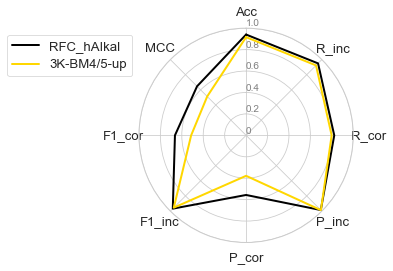

In [62]:
plot_radar( df_validation_haikal_and_codes[['RFC_hAIkal','3K-BM4/5-up']].T,
           "figure_haikal_codes_validation",
           ['black','gold'],
           ['solid','solid'])

black RFC_hAIkal
gold CoDES_Score_set


<PolarAxesSubplot:>

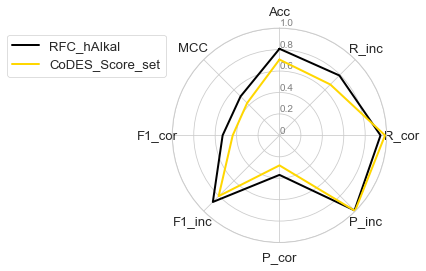

In [63]:
plot_radar( df_score_set_haikal_and_codes[['RFC_hAIkal','CoDES_Score_set']].T,
           "figure_haikal_codes_score_set",
           ['black','gold'],
           ['solid','solid'])

black Perceptron_Ori
gold Perceptron_hAIkal


<PolarAxesSubplot:>

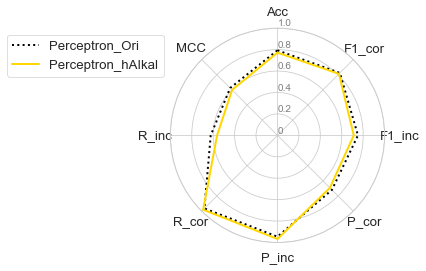

In [64]:
plot_radar(df_haikal_test_set_bal[pp].T,
           "figure_haikal_test_bal_Perceptron",
           ['black','gold'],
           ['dotted','solid'])

black TF2_Ori
gold TF2_hAIkal


<PolarAxesSubplot:>

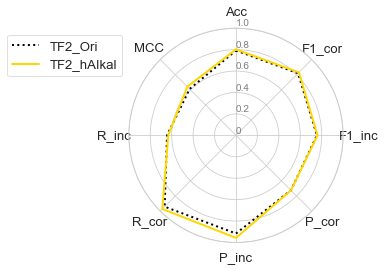

In [65]:
plot_radar(df_haikal_test_set_bal[tf2].T,
           "figure_haikal_test_bal_TF2",
           ['black','gold'],
           ['dotted','solid'])

black RFC_Ori
gold RFC_hAIkal


<PolarAxesSubplot:>

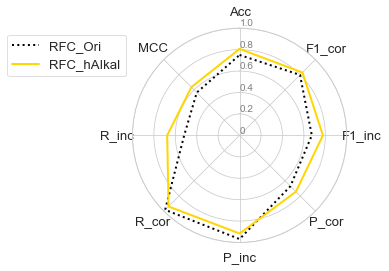

In [66]:
plot_radar(df_haikal_test_set_bal[rfc].T,
           "figure_haikal_test_bal_RFC",
           ['black','gold'],
           ['dotted','solid'])

black RFC_Ori
green RFC_hAIkal


<PolarAxesSubplot:>

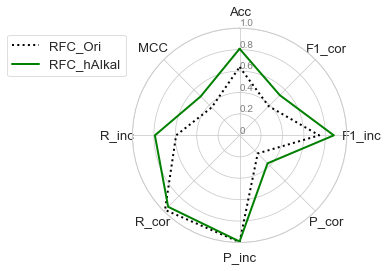

In [67]:
plot_radar(df_haikal_test_set_unb[rfc].T,
           "figure_haikal_test_unb_RFC",
           ['black','green'],
           ['dotted','solid'])

black TF2_Ori
green TF2_hAIkal


<PolarAxesSubplot:>

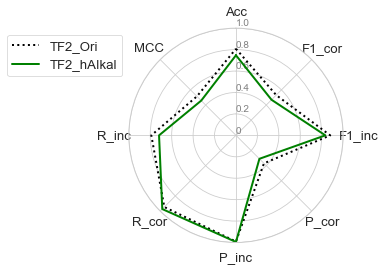

In [68]:
plot_radar(df_haikal_test_set_unb[tf2].T,
           "figure_haikal_test_unb_TF2",
           ['black','green'],
           ['dotted','solid'])

black Perceptron_Ori
green Perceptron_hAIkal


<PolarAxesSubplot:>

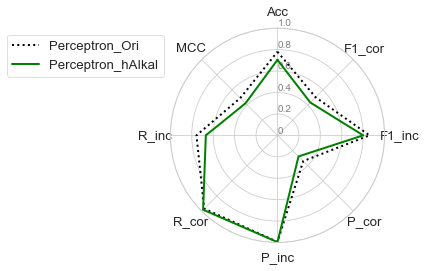

In [69]:
plot_radar(df_haikal_test_set_unb[pp].T,
           "figure_haikal_test_unb_Perceptron",
           ['black','green'],
           ['dotted','solid'])

black Perceptron_Ori
green Perceptron_hAIkal


<PolarAxesSubplot:>

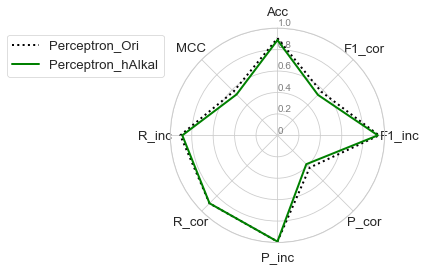

In [70]:
plot_radar(df_haikal_validation_set_unb[pp].T,
           "figure_haikal_validation_unb_Perceptron",
           ['black','green'],
           ['dotted','solid'])

black RFC_Ori
green RFC_hAIkal


<PolarAxesSubplot:>

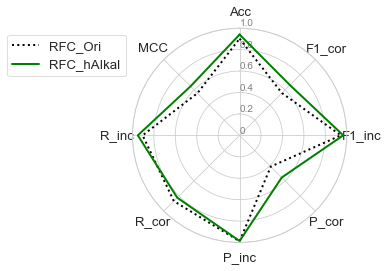

In [71]:
plot_radar(df_haikal_validation_set_unb[rfc].T,
           "figure_haikal_validation_unb_RFC",
           ['black','green'],
           ['dotted','solid'])

black TF2_Ori
green TF2_hAIkal


<PolarAxesSubplot:>

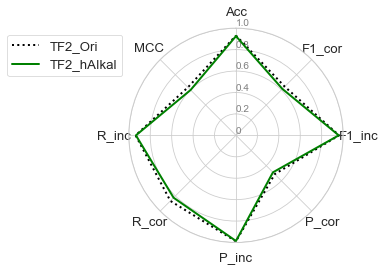

In [72]:
plot_radar(df_haikal_validation_set_unb[tf2].T,
           "figure_haikal_validation_unb_TF2",
           ['black','green'],
           ['dotted','solid'])

black TF2_Ori
gold TF2_hAIkal


<PolarAxesSubplot:>

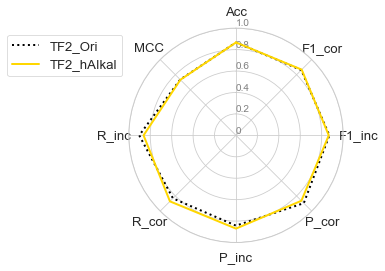

In [73]:
plot_radar(df_haikal_validation_set_bal[tf2].T,
           "figure_haikal_validation_bal_TF2",
           ['black','gold'],
           ['dotted','solid'])

black Perceptron_Ori
gold Perceptron_hAIkal


<PolarAxesSubplot:>

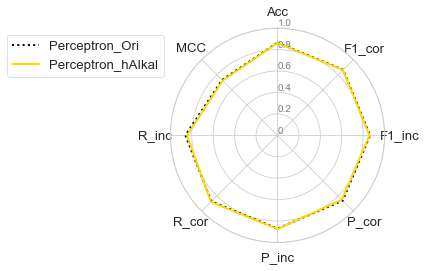

In [74]:
plot_radar(df_haikal_validation_set_bal[pp].T,
           "figure_haikal_validation_bal_Perceptron",
           ['black','gold'],
           ['dotted','solid'])

black RFC_Ori
gold RFC_hAIkal


<PolarAxesSubplot:>

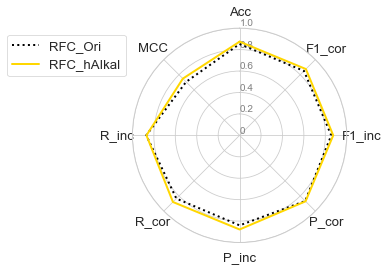

In [75]:
plot_radar(df_haikal_validation_set_bal[rfc].T,
           "figure_haikal_validation_bal_RFC",
           ['black','gold'],
           ['dotted','solid'])

In [76]:
TF2_models =["TF2_models_snorkel_trained_32_0.5_adam.h5","TF2_models_snorkel_trained_16_0.5_adam.h5", "TF2_models_snorkel_trained_8_0.5_adam.h5"] 

df_haikal_test_set_unb = pd.concat( [ df_haikal_test_set_unb, df_TF2_haikal_test_unb[TF2_models] ], axis=1 )
                                
df_haikal_test_set_bal = pd.concat([df_haikal_test_set_bal, df_TF2_haikal_test_bal[TF2_models] ], axis=1 )

df_haikal_validation_set_bal = pd.concat([df_haikal_validation_set_bal,df_TF2_haikal_validation_bal[TF2_models] ], axis=1)

df_haikal_validation_set_unb = pd.concat([df_haikal_validation_set_unb, df_TF2_haikal_validation_unb[TF2_models]] , axis =1 )  

In [77]:
df_haikal_validation_set_bal

,Perceptron_Ori,Perceptron_hAIkal,TF2_Ori,TF2_hAIkal,RFC_Ori,RFC_hAIkal,TF2_models_snorkel_trained_32_0.5_adam.h5,TF2_models_snorkel_trained_16_0.5_adam.h5,TF2_models_snorkel_trained_8_0.5_adam.h5
Acc,0.8655,0.8612,0.8671,0.8669,0.8527,0.8744,0.5733,0.8612,0.8355
F1_cor,0.8663,0.8636,0.8622,0.8675,0.8499,0.8751,0.2582,0.866,0.8203
F1_inc,0.8647,0.8586,0.8717,0.8662,0.8554,0.8738,0.7005,0.8562,0.8484
P_cor,0.8611,0.8487,0.8952,0.8635,0.8662,0.8706,0.9867,0.8374,0.9042
P_inc,0.8701,0.8746,0.8428,0.8702,0.8402,0.8784,0.5396,0.8887,0.7868
R_cor,0.8717,0.8791,0.8316,0.8714,0.8343,0.8797,0.1485,0.8965,0.7506
R_inc,0.8594,0.8432,0.9027,0.8623,0.8711,0.8692,0.998,0.8259,0.9205
MCC,0.7311,0.7228,0.7361,0.7338,0.7059,0.7489,0.2777,0.7243,0.681


In [78]:
new_cols =['Perceptron_Ori','Perceptron_hAIkal','TF2_Ori','TF2_hAIkal','RF_Ori','RF_hAIkal','TF2_HP_hAIkal_32','TF2_HP_hAIkal_16','TF2_HP_hAIkal_8']
df_haikal_test_set_bal.columns = new_cols
df_haikal_test_set_unb.columns = new_cols 
df_haikal_validation_set_unb.columns = new_cols
df_haikal_validation_set_bal.columns = new_cols
rfc = ['RF_Ori', 'RF_hAIkal']

In [79]:
df_haikal_test_set_bal = df_haikal_test_set_bal.T
df_haikal_test_set_unb = df_haikal_test_set_unb.T
df_haikal_validation_set_unb = df_haikal_validation_set_unb.T 
df_haikal_validation_set_bal = df_haikal_validation_set_bal.T

In [80]:
new_cols =['Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']
df_haikal_test_set_bal = df_haikal_test_set_bal[new_cols]
df_haikal_test_set_unb = df_haikal_test_set_unb[new_cols]
df_haikal_validation_set_bal = df_haikal_validation_set_bal[new_cols]
df_haikal_validation_set_unb = df_haikal_validation_set_unb[new_cols]

In [81]:
df_haikal_test_set_bal = df_haikal_test_set_bal.T
df_haikal_test_set_unb = df_haikal_test_set_unb.T
df_haikal_validation_set_unb = df_haikal_validation_set_unb.T 
df_haikal_validation_set_bal = df_haikal_validation_set_bal.T

black RF_Ori
gold RF_hAIkal


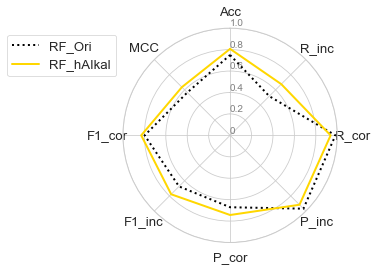

In [82]:
uno  = plot_radar(df_haikal_test_set_bal[rfc].T,
           "figure_haikal_test_bal_RFC",
           ['black','gold'],
           ['dotted','solid'])

black RF_Ori
gold RF_hAIkal


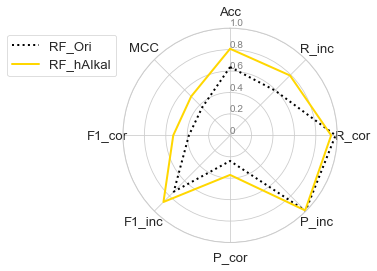

In [83]:
dos = plot_radar(df_haikal_test_set_unb[rfc].T,
           "figure_haikal_test_unb_RFC",
           ['black','gold'],
           ['dotted','solid'])

black TF2_Ori
green TF2_HP_hAIkal_8
grey TF2_HP_hAIkal_16
navy TF2_HP_hAIkal_32


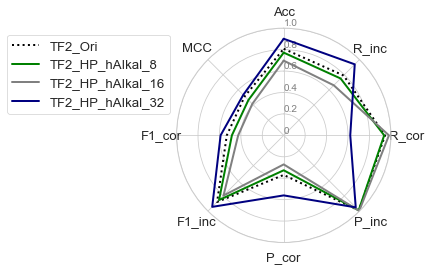

In [84]:
tres = plot_radar(df_haikal_test_set_unb[['TF2_Ori','TF2_HP_hAIkal_8','TF2_HP_hAIkal_16','TF2_HP_hAIkal_32']].T,
           "figure_haikal_test_unb_TF2_HP",
            ['black','green','grey','navy'],
           ['dotted','solid',"solid","solid"])

black TF2_Ori
gold TF2_HP_hAIkal_8
orange TF2_HP_hAIkal_16
brown TF2_HP_hAIkal_32


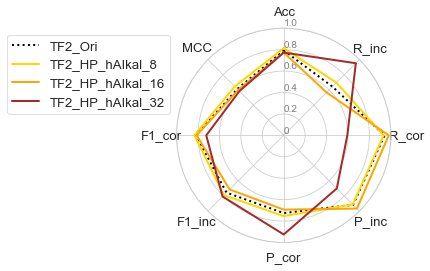

In [85]:
cuatro = plot_radar(df_haikal_test_set_bal[['TF2_Ori','TF2_HP_hAIkal_8','TF2_HP_hAIkal_16','TF2_HP_hAIkal_32']].T,
           "figure_haikal_test_bal_TF2_HP",
            ['black','gold','orange','brown'],

        #    ['black','green','grey'],
           ['dotted','solid',"solid","solid"])

black TF2_Ori
gold TF2_HP_hAIkal_8
orange TF2_HP_hAIkal_16
brown TF2_HP_hAIkal_32


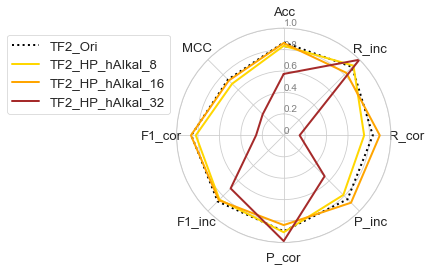

In [86]:
cinco = plot_radar(df_haikal_validation_set_bal[['TF2_Ori','TF2_HP_hAIkal_8','TF2_HP_hAIkal_16','TF2_HP_hAIkal_32']].T,
           "figure_haikal_val_bal_TF2_HP",
            ['black','gold','orange','brown'],

            # ['black','green','grey'],
           ['dotted','solid',"solid","solid"])

black TF2_Ori
green TF2_HP_hAIkal_8
grey TF2_HP_hAIkal_16
navy TF2_HP_hAIkal_32


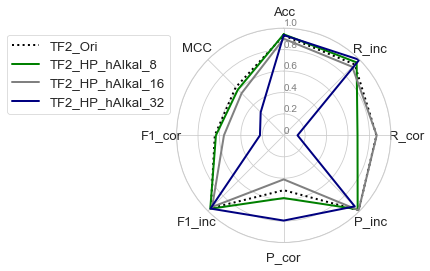

In [87]:
seis = plot_radar(df_haikal_validation_set_unb[['TF2_Ori','TF2_HP_hAIkal_8','TF2_HP_hAIkal_16','TF2_HP_hAIkal_32']].T,
           "figure_haikal_val_unb_TF2_HP",
            # ['black','gold','orange'],

           ['black','green','grey','navy'],
           ['dotted','solid',"solid","solid"])

In [88]:
df_haikal_validation_set_unb

,Perceptron_Ori,Perceptron_hAIkal,TF2_Ori,TF2_hAIkal,RF_Ori,RF_hAIkal,TF2_HP_hAIkal_32,TF2_HP_hAIkal_16,TF2_HP_hAIkal_8
Acc,0.9064,0.8887,0.9317,0.926,0.9024,0.9407,0.9357,0.9021,0.9431
R_inc,0.9071,0.8881,0.9368,0.9338,0.905,0.9498,0.9975,0.9048,0.9626
R_cor,0.8974,0.8968,0.8655,0.8233,0.8677,0.8228,0.1288,0.8677,0.6887
P_inc,0.9914,0.9912,0.9891,0.9857,0.9889,0.9859,0.9373,0.9889,0.9758
P_cor,0.4253,0.3805,0.5118,0.4881,0.4118,0.5564,0.7954,0.411,0.5854
F1_inc,0.9474,0.9368,0.9622,0.9591,0.9451,0.9675,0.9664,0.945,0.9692
F1_cor,0.5771,0.5343,0.6433,0.6128,0.5585,0.6639,0.2217,0.5578,0.6328
MCC,0.579,0.5401,0.6339,0.5989,0.5565,0.6473,0.3042,0.5558,0.6046


In [89]:
df_haikal_validation_set_bal

,Perceptron_Ori,Perceptron_hAIkal,TF2_Ori,TF2_hAIkal,RF_Ori,RF_hAIkal,TF2_HP_hAIkal_32,TF2_HP_hAIkal_16,TF2_HP_hAIkal_8
Acc,0.8655,0.8612,0.8671,0.8669,0.8527,0.8744,0.5733,0.8612,0.8355
R_inc,0.8594,0.8432,0.9027,0.8623,0.8711,0.8692,0.998,0.8259,0.9205
R_cor,0.8717,0.8791,0.8316,0.8714,0.8343,0.8797,0.1485,0.8965,0.7506
P_inc,0.8701,0.8746,0.8428,0.8702,0.8402,0.8784,0.5396,0.8887,0.7868
P_cor,0.8611,0.8487,0.8952,0.8635,0.8662,0.8706,0.9867,0.8374,0.9042
F1_inc,0.8647,0.8586,0.8717,0.8662,0.8554,0.8738,0.7005,0.8562,0.8484
F1_cor,0.8663,0.8636,0.8622,0.8675,0.8499,0.8751,0.2582,0.866,0.8203
MCC,0.7311,0.7228,0.7361,0.7338,0.7059,0.7489,0.2777,0.7243,0.681


In [90]:
df_haikal_test_set_bal

,Perceptron_Ori,Perceptron_hAIkal,TF2_Ori,TF2_hAIkal,RF_Ori,RF_hAIkal,TF2_HP_hAIkal_32,TF2_HP_hAIkal_16,TF2_HP_hAIkal_8
Acc,0.7937,0.7723,0.7922,0.802,0.7502,0.807,0.7727,0.7732,0.8138
R_inc,0.6229,0.5634,0.643,0.6319,0.5171,0.6757,0.9519,0.5659,0.6952
R_cor,0.9643,0.9809,0.9412,0.9718,0.9829,0.9382,0.5935,0.9805,0.9323
P_inc,0.9457,0.9672,0.9161,0.9573,0.968,0.916,0.7007,0.9666,0.9113
P_cor,0.7192,0.6923,0.7253,0.7256,0.6709,0.7434,0.925,0.6931,0.7536
F1_inc,0.7511,0.7121,0.7556,0.7613,0.6741,0.7777,0.8072,0.7139,0.7887
F1_cor,0.8239,0.8117,0.8193,0.8309,0.7975,0.8295,0.7231,0.8121,0.8335
MCC,0.6248,0.5992,0.6121,0.6421,0.5652,0.6363,0.5842,0.6004,0.646


In [91]:
df_haikal_test_set_unb

,Perceptron_Ori,Perceptron_hAIkal,TF2_Ori,TF2_hAIkal,RF_Ori,RF_hAIkal,TF2_HP_hAIkal_32,TF2_HP_hAIkal_16,TF2_HP_hAIkal_8
Acc,0.7802,0.7047,0.808,0.7472,0.6376,0.808,0.9013,0.6973,0.772
R_inc,0.7559,0.6687,0.7901,0.7179,0.5925,0.7905,0.9374,0.6607,0.7507
R_cor,0.9671,0.9815,0.9458,0.9727,0.9843,0.9431,0.621,0.982,0.9377
P_inc,0.9944,0.9964,0.9912,0.9951,0.9966,0.9907,0.9506,0.9965,0.9894
P_cor,0.3399,0.278,0.3694,0.3095,0.2389,0.3691,0.5604,0.2712,0.326
F1_inc,0.8589,0.8003,0.8793,0.8341,0.7432,0.8793,0.9439,0.7946,0.8537
F1_cor,0.503,0.4333,0.5313,0.4695,0.3845,0.5305,0.5891,0.4251,0.4838
MCC,0.4916,0.4224,0.5151,0.4586,0.3685,0.5137,0.5341,0.4148,0.466


In [92]:
df_balanced_initial_classifers = pd.read_csv("../data/balanced_classifers_BM5.csv")
df_unbalanced_initial_classifiers = pd.read_csv("../data/unbalanced_classifers_BM5.csv")

In [93]:
df_balanced_initial_classifers.columns = ['Classifier','Acc','R_inc','R_cor','P_inc','P_cor','F1_inc','F1_cor','MCC']
df_unbalanced_initial_classifiers.columns = ['Classifier','Acc','R_inc','R_cor','P_inc','P_cor','F1_inc','F1_cor','MCC']

In [94]:
df_balanced_initial_classifers = reorder_df(df_balanced_initial_classifers.T)
df_unbalanced_initial_classifiers = reorder_df(df_unbalanced_initial_classifiers.T)


black Random Forest
green Gradient boosting
grey Decision Tree
navy AdaBoost
plum XgBoost


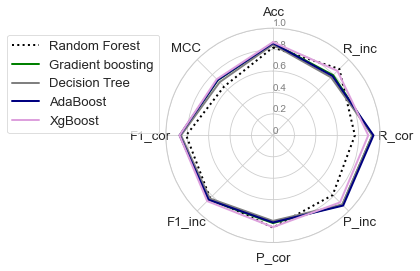

In [95]:
seven = plot_radar(df_balanced_initial_classifers[['Random Forest','Gradient boosting','Decision Tree','AdaBoost','XgBoost']].T,
           "figure_initial_classifiers_balanced_trees",
            # ['black','gold','orange'],

           ['black','green','grey','navy','plum'],
           ['dotted','solid',"solid","solid","solid"])

black Random Forest
green Gradient boosting
grey Decision Tree
blue AdaBoost
plum XgBoost


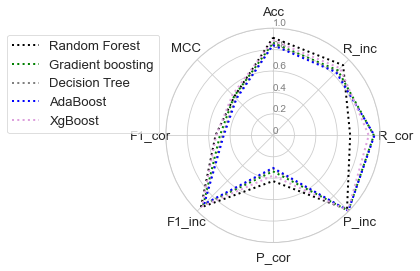

In [96]:
seven = plot_radar(df_unbalanced_initial_classifiers[['Random Forest','Gradient boosting','Decision Tree','AdaBoost','XgBoost']].T,
           "figure_initial_classifiers_unbalanced_trees",
            # ['black','gold','orange'],

           ['black','green','grey','blue','plum'],
           ['dotted','dotted','dotted','dotted','dotted']
        #    ['solid','solid','solid','solid','solid']
           )

In [97]:
df_balanced_initial_classifers[['Random Forest','Gradient boosting','Decision Tree','AdaBoost','XgBoost']].T

Metrics,Acc,R_inc,R_cor,P_inc,P_cor,F1_inc,F1_cor,MCC
Random Forest,0.8204,0.8763,0.7645,0.7882,0.8608,0.8299,0.8098,0.6449
Gradient boosting,0.8612,0.794,0.9283,0.9172,0.8184,0.8512,0.8699,0.7289
Decision Tree,0.8469,0.7661,0.9277,0.9138,0.7986,0.8334,0.8584,0.7031
AdaBoost,0.8611,0.7843,0.9379,0.9266,0.813,0.8496,0.871,0.7309
XgBoost,0.8703,0.8511,0.8895,0.8851,0.8566,0.8678,0.8728,0.7412


In [98]:
df_unbalanced_initial_classifiers[['Random Forest','Gradient boosting','Decision Tree','AdaBoost','XgBoost']].T

Metrics,Acc,R_inc,R_cor,P_inc,P_cor,F1_inc,F1_cor,MCC
Random Forest,0.9112,0.9259,0.7205,0.9774,0.4268,0.9509,0.536,0.5111
Gradient boosting,0.8632,0.8572,0.9417,0.9948,0.3357,0.9209,0.4949,0.5138
Decision Tree,0.8489,0.8418,0.9423,0.9948,0.3133,0.9119,0.4702,0.4915
AdaBoost,0.8415,0.8334,0.9472,0.9952,0.3034,0.9071,0.4596,0.4828
XgBoost,0.8867,0.8862,0.8937,0.9909,0.3756,0.9356,0.529,0.5347


b RF
gold PRC
g SVM


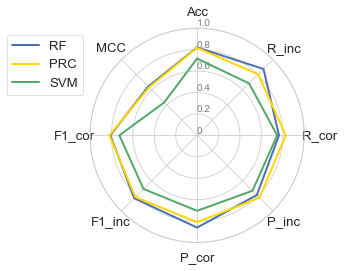

In [103]:
dbic = df_balanced_initial_classifers[['Random Forest','Neural Net','SVM']]
dbic.columns = ['RF','PRC','SVM']
colors = ['b','gold','g']
lines = ['solid','solid','solid']
ocho = plot_radar(dbic.T,"Figure_2B",colors,lines)

Navy RF
goldenrod PRC
darkgreen SVM


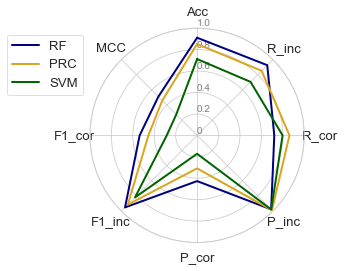

In [104]:
duic = df_unbalanced_initial_classifiers[['Random Forest','Neural Net','SVM']]
duic.columns = ["RF","PRC","SVM"]
colors = ['Navy','goldenrod','darkgreen']
lines = ['solid','solid','solid']
ocho = plot_radar(duic.T,"Figure_2A",colors,lines)

In [116]:
duic.T

Metrics,Acc,R_inc,R_cor,P_inc,P_cor,F1_inc,F1_cor,MCC
RF,0.9112,0.9259,0.7205,0.9774,0.4268,0.9509,0.536,0.5111
PRC,0.8525,0.8518,0.8621,0.9878,0.3083,0.9148,0.4542,0.4597
SVM,0.7122,0.7056,0.7979,0.9785,0.1719,0.8199,0.2829,0.2752


In [108]:
dbic.T

Metrics,Acc,R_inc,R_cor,P_inc,P_cor,F1_inc,F1_cor,MCC
RF,0.8204,0.8763,0.7645,0.7882,0.8608,0.8299,0.8098,0.6449
PRC,0.8167,0.8062,0.8273,0.8236,0.8102,0.8148,0.8186,0.6336
SVM,0.7167,0.6858,0.7477,0.731,0.7041,0.7077,0.7252,0.4343


In [127]:
df_unbalanced_initial_classifiers.T.columns

Index(['Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC'], dtype='object', name='Metrics')

In [128]:
df_metrics_unbalanced.columns = df_unbalanced_initial_classifiers.T.columns

black Random Forest
green Gradient boosting
grey Decision Tree
blue AdaBoost
plum XgBoost


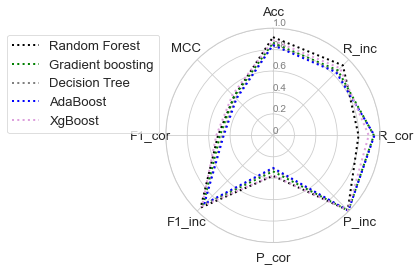

In [143]:
df_temp = pd.concat([df_metrics_unbalanced.loc['RF '].round(4),df_unbalanced_initial_classifiers[['Gradient boosting','Decision Tree','AdaBoost','XgBoost']]] , axis=1 )
title = "figure_initial_classifiers_unbalanced_trees"
colors = ['black','green','grey','blue','plum']
lines  = ['dotted','dotted','dotted','dotted','dotted']
df_temp.columns = ['Random Forest','Gradient boosting','Decision Tree','AdaBoost','XgBoost'] 

ten = plot_radar(df_temp.T , title, colors, lines)

In [142]:
df_temp.T

Metrics,Acc,R_inc,R_cor,P_inc,P_cor,F1_inc,F1_cor,MCC
Random Forest,0.9164,0.9232,0.7985,0.9874,0.3777,0.9543,0.5128,0.5133
Gradient boosting,0.8632,0.8572,0.9417,0.9948,0.3357,0.9209,0.4949,0.5138
Decision Tree,0.8489,0.8418,0.9423,0.9948,0.3133,0.9119,0.4702,0.4915
AdaBoost,0.8415,0.8334,0.9472,0.9952,0.3034,0.9071,0.4596,0.4828
XgBoost,0.8867,0.8862,0.8937,0.9909,0.3756,0.9356,0.529,0.5347


In [ ]:
df_act_II_v2 = pd.read_csv("../data/results_table_noCR_v3.csv",index_col=0)
df_act_II_v3 = pd.read_csv("../data/results_table_noCR_v4.csv",index_col=0)


In [ ]:
columns = ['MCC','Acc', 'P_Ph', 'P_NoNPh', 'R_Ph','R_NoNPh', 'F1_Ph', 'F1_NoNPh']
edit_name = ['NN_A_C','NN_F_S','RF_A_C','RF_F_S'] 

In [ ]:
df_act_II_v2["CLASS"] = edit_name
df_act_II_v3["CLASS"] = edit_name

In [ ]:
df_act_II_v2.drop(["Train","Classifier"],axis=1,inplace=True)
df_act_II_v3.drop(["Train","Classifier"],axis=1,inplace=True)

In [ ]:
df_act_II_v2.set_index("CLASS",inplace=True)
df_act_II_v3.set_index("CLASS",inplace=True)

In [ ]:
df_act_II_v2.columns = columns
df_act_II_v3.columns = columns


In [ ]:
plot_radar(df_act_II_v2[['Acc', 'P_Ph', 'P_NoNPh', 'R_Ph','R_NoNPh', 'F1_Ph', 'F1_NoNPh','MCC']],
           "figure_activity_II_benchmark_v2",
           ['Navy','gold','grey','green'],
           ['solid','solid','solid','solid']
          )


In [ ]:
df_act_II_v2[['Acc', 'P_Ph', 'P_NoNPh', 'R_Ph','R_NoNPh', 'F1_Ph', 'F1_NoNPh','MCC']]

In [ ]:
plot_radar(df_act_II_v3[['Acc', 'P_Ph', 'P_NoNPh', 'R_Ph','R_NoNPh', 'F1_Ph', 'F1_NoNPh','MCC']],
           "figure_activity_II_benchmark_v3",
           ['Navy','gold','grey','green'],
           ['solid','solid','solid','solid']
          )

In [ ]:
df_act_II_v3[['Acc', 'P_Ph', 'P_NoNPh', 'R_Ph','R_NoNPh', 'F1_Ph', 'F1_NoNPh','MCC']]

In [ ]:
df_haikal_validation_set_unb

In [ ]:
df = pd.read_csv("../data/table_Score_set_all_tmp.csv")

In [ ]:
df

In [ ]:
def decompress(x):
    total = x.split("/")[0]
    all_others = x.split("/")[1:]
    num = 0 
    num_b = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "***"   : 
            num = x[0]
        elif x[1:] == "**"  :
            num_b = x[0]
        else:
            break
    return total, num ,num_b

def get_all(x):
    total = x.split("/")[0]
    return int(total)

def get_high(x):
    all_others = x.split("/")[1:]
    num = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "***"   : 
            num = x[0]
    return int(num) 

def get_med(x):
    all_others = x.split("/")[1:]
    num = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "**"   : 
            num = x[0]
    return int(num) 

In [ ]:
df["CoDES"].apply(decompress)

In [ ]:
df["CoDES"].apply(get_all)

In [ ]:
firts_data = pd.DataFrame()

In [ ]:
#  firts_data["CoDES"] =  df["CoDES"].apply(get_all)
for m in ['CoDES','GraphRank','IScore','CAPRI_best']: 
#     print (m)
    firts_data[m] =  df[m].apply(get_all)

In [ ]:
firts_data["T"] = df["T"]

In [ ]:
firts_data.set_index("T", inplace=True)

In [ ]:
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks(range(0,12,2), ["0","2","4","6","8","10"], color="grey", size=10)
    plt.ylim(0,10)
      # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
      # plt.ylim(0.4,1)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
    plt.legend( bbox_to_anchor=(0, 1))

    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")


In [ ]:
# plot_radar(firts_data.T, )
plot_radar(firts_data.drop("T35").T,
           "figure_Score_a",
           ['Gold','Salmon','coral',],
           ['solid','dotted','dashdot'])

In [ ]:
firts_data[['CoDES','GraphRank','IScore']].drop("T35").plot(kind="bar")
plt.legend( bbox_to_anchor=(1, 1))
plt.ylabel("# Corr solution",size=16)
plt.xlabel("")
plt.tight_layout()

plt.savefig("figures/barplot_scorer_comp.png",dpi=300,format='png',transparent=True)


In [ ]:
df = pd.read_csv("../data/Map-DS.csv")

In [ ]:
df.set_index("Position title",inplace=True)

In [ ]:
def one_hot_encode(x):
    if x == "Low":
        return 1
    elif x == "Med":
        return 2
    else:
        return 3

In [ ]:
df.columns

In [ ]:
for m in df.columns:
    df[m] = df[m].apply(one_hot_encode)

In [ ]:
df

In [ ]:
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([1,2,3], ["Low","Med","High"], color="grey", size=10)
    plt.ylim(0,3)
      # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
      # plt.ylim(0.4,1)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=1, linestyle=style, label=row)
        ax.fill(angles, values,i , alpha=0.1)



      # Add legend
#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
    plt.legend( bbox_to_anchor=(0, 0.75))

    plt.tight_layout()
    #   plt.show()
    plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
#     plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")


In [ ]:
plot_radar(df,
           "RP_DS_table",
           ['Salmon','Navy','Black','Green','Red'],
           ['dashdot','dashdot','dashdot','dashdot','dashdot'])